In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tf-keras

In [ ]:
pip install tensorflow-model-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tf_keras as keras
from tf_keras.models import Model
from tf_keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, SeparableConv2D
import pandas as pd
import numpy as np
import tensorflow_model_optimization as tfmot

In [ ]:
img_size = 224
batch_size = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_igen = ImageDataGenerator(rescale  = 1./255,
                             zoom_range = .1,
                            horizontal_flip=True,
                            brightness_range= (0.8,1.2),
                            validation_split = .2)
test_igen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = '/content/drive/MyDrive/ai_real_images/train'
test_dir = '/content/drive/MyDrive/ai_real_images/test'

In [ ]:
train_datagen = train_igen.flow_from_directory(train_dir, target_size = (img_size, img_size),
                                               batch_size = batch_size, shuffle = True,
                                               class_mode = 'categorical', subset = 'training')
valid_datagen = train_igen.flow_from_directory(train_dir, target_size = (img_size, img_size), batch_size = batch_size, shuffle = True,
                                               class_mode = 'categorical', subset = 'validation')
test_datagen = test_igen.flow_from_directory(test_dir, target_size = (img_size, img_size),
                                             batch_size = batch_size, shuffle = True, class_mode = 'categorical')

Found 5596 images belonging to 2 classes.
Found 1398 images belonging to 2 classes.
Found 1300 images belonging to 2 classes.


In [ ]:
input = Input(shape=(img_size, img_size, 3))
vgg_block1 = SeparableConv2D(64, (3, 3), padding='same')(input)
vgg_block1 = BatchNormalization()(vgg_block1)
vgg_block1 = Activation('elu')(vgg_block1)
vgg_block1 = SeparableConv2D(64, (3, 3), padding='SAME')(vgg_block1)
vgg_block1 = BatchNormalization()(vgg_block1)
vgg_block1 = Activation('elu')(vgg_block1)
vgg_block1 = MaxPooling2D((2, 2))(vgg_block1)  # 112*112*64

vgg_block2 = SeparableConv2D(128, (3, 3), padding='SAME')(vgg_block1)
vgg_block2 = BatchNormalization()(vgg_block2)
vgg_block2 = Activation('elu')(vgg_block2)
vgg_block2 = SeparableConv2D(128, (3, 3), padding='SAME')(vgg_block2)
vgg_block2 = BatchNormalization()(vgg_block2)
vgg_block2 = Activation('elu')(vgg_block2)
vgg_block2 = MaxPooling2D((2, 2))(vgg_block2)  # 56*56*128

vgg_block3 = SeparableConv2D(256, (3, 3), padding='SAME')(vgg_block2)
vgg_block3 = BatchNormalization()(vgg_block3)
vgg_block3 = Activation('elu')(vgg_block3)
vgg_block3 = SeparableConv2D(256, (3, 3), padding='SAME')(vgg_block3)
vgg_block3 = BatchNormalization()(vgg_block3)
vgg_block3 = Activation('elu')(vgg_block3)
vgg_block3 = SeparableConv2D(256, (3, 3), padding='SAME')(vgg_block3)
vgg_block3 = BatchNormalization()(vgg_block3)
vgg_block3 = Activation('elu')(vgg_block3)
vgg_block3 = SeparableConv2D(256, (3, 3), padding='SAME')(vgg_block3)
vgg_block3 = BatchNormalization()(vgg_block3)
vgg_block3 = Activation('elu')(vgg_block3)
vgg_block3 = MaxPooling2D((2, 2))(vgg_block3)  # 28*28*256

vgg_block4 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block3)
vgg_block4 = BatchNormalization()(vgg_block4)
vgg_block4 = Activation('elu')(vgg_block4)
vgg_block4 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block4)
vgg_block4 = BatchNormalization()(vgg_block4)
vgg_block4 = Activation('elu')(vgg_block4)
vgg_block4 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block4)
vgg_block4 = BatchNormalization()(vgg_block4)
vgg_block4 = Activation('elu')(vgg_block4)
vgg_block4 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block4)
vgg_block4 = BatchNormalization()(vgg_block4)
vgg_block4 = Activation('elu')(vgg_block4)
vgg_block4 = MaxPooling2D((2, 2))(vgg_block4)  # 14*14*512

vgg_block5 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block4)
vgg_block5 = BatchNormalization()(vgg_block5)
vgg_block5 = Activation('elu')(vgg_block5)
vgg_block5 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block5)
vgg_block5 = BatchNormalization()(vgg_block5)
vgg_block5 = Activation('elu')(vgg_block5)
vgg_block5 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block5)
vgg_block5 = BatchNormalization()(vgg_block5)
vgg_block5 = Activation('elu')(vgg_block5)
vgg_block5 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block5)
vgg_block5 = BatchNormalization()(vgg_block5)
vgg_block5 = Activation('elu')(vgg_block5)
vgg_block5 = MaxPooling2D((2, 2))(vgg_block5)  # 7*7*512

flatten = Flatten()(vgg_block5)

dense1 = Dense(4096, activation='relu')(flatten)
dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(4096, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense2)
output = Dense(2, activation='softmax')(dropout2)

# Create the original model
model = Model(inputs=input, outputs=output)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

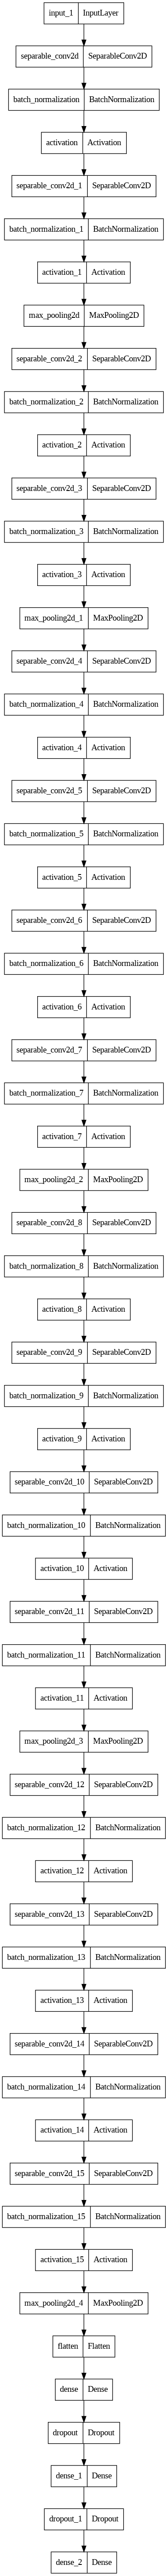

In [ ]:
keras.utils.plot_model(model)

In [ ]:
steps_per_epoch = 174
validation_steps = 43

In [ ]:
import time

In [ ]:
start_time = time.time()

In [ ]:
history = model.fit(train_datagen,
                                validation_data=valid_datagen,
                                epochs=40,
                                batch_size=batch_size,
                                steps_per_epoch=steps_per_epoch,
                                validation_steps=validation_steps)

Epoch 1/40
 13/174 [=>............................] - ETA: 43:07 - loss: 4.0824 - accuracy: 0.5505

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


174/174 [==============================] - 1814s 10s/step - loss: 0.8310 - accuracy: 0.7477 - val_loss: 0.6926 - val_accuracy: 0.5167
Epoch 2/40
174/174 [==============================] - 201s 1s/step - loss: 0.4129 - accuracy: 0.8237 - val_loss: 0.6978 - val_accuracy: 0.4840
Epoch 3/40
174/174 [==============================] - 188s 1s/step - loss: 0.3566 - accuracy: 0.8555 - val_loss: 1.6390 - val_accuracy: 0.4811
Epoch 4/40
174/174 [==============================] - 189s 1s/step - loss: 0.3287 - accuracy: 0.8657 - val_loss: 1.7082 - val_accuracy: 0.4949
Epoch 5/40
174/174 [==============================] - 190s 1s/step - loss: 0.3121 - accuracy: 0.8760 - val_loss: 0.2580 - val_accuracy: 0.8910
Epoch 6/40
174/174 [==============================] - 181s 1s/step - loss: 0.2927 - accuracy: 0.8814 - val_loss: 0.2977 - val_accuracy: 0.8844
Epoch 7/40
174/174 [==============================] - 212s 1s/step - loss: 0.2850 - accuracy: 0.8859 - val_loss: 0.3736 - val_accuracy: 0.8605
Epoch 8/

In [ ]:
end_time = time.time()

In [ ]:
training_time = end_time - start_time

print(f"훈련시간 : {training_time:.2f}")

훈련시간 : 8923.96


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 separable_conv2d (Separabl  (None, 224, 224, 64)      283       
 eConv2D)                                                        
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 separable_conv2d_1 (Separa  (None, 224, 224, 64)      4736      
 bleConv2D)                                                      
                                                             

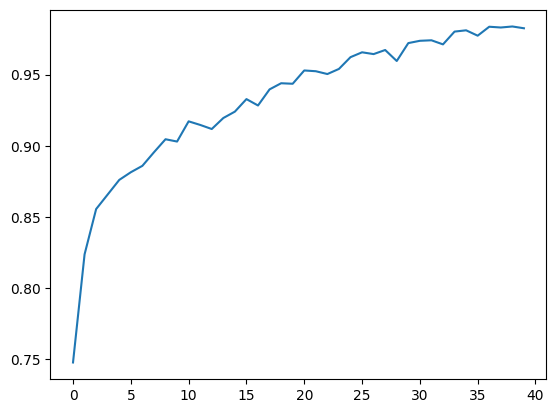

In [ ]:
plt.plot(history.history['accuracy'])

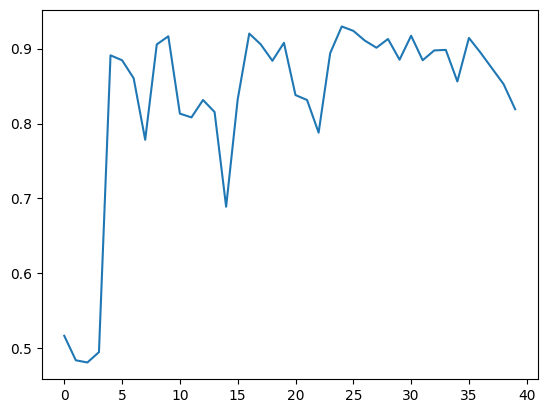

In [ ]:
plt.plot(history.history['val_accuracy'])

In [ ]:
model.evaluate(test_datagen, steps=41)

41/41 [==============================] - 636s 16s/step - loss: 1.0393 - accuracy: 0.7531


[1.0392671823501587, 0.7530769109725952]

In [ ]:
model.save('sep_vgg.h5')

NameError: name 'model' is not defined

In [ ]:
!cp /content/sep_vgg.h5 /content/drive/MyDrive/model/sep_vgg.h5